In [1]:
#importing libraries
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
warnings.filterwarnings('ignore')

In [2]:
path ='https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv'
df = pd.read_csv(path)
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
#checking for any null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

there is no any null data present in this data

In [5]:
#checking types of data
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# Converting the categorical object data to categorical numerical data for better understanding

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
data1=['Country', 'Region']
for i in data1:
    df[i]=le.fit_transform(df[i].astype(str))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Expolatory Data Analysis

Plotting graphs for better understanding

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

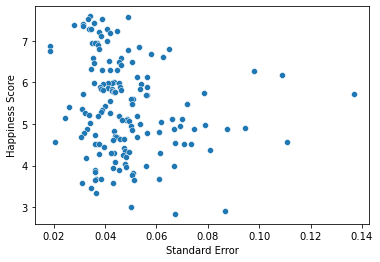

In [9]:
sns.scatterplot(x="Standard Error",y="Happiness Score",data=df)

Dense distribution of data is in between 0.02 to 0.08

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

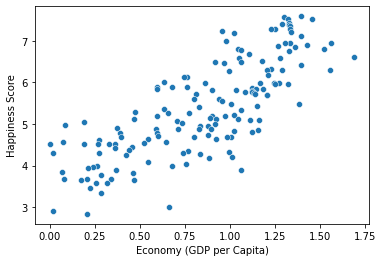

In [10]:
sns.scatterplot(x="Economy (GDP per Capita)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

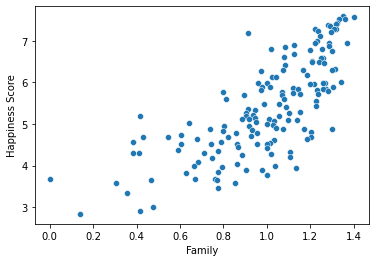

In [11]:
sns.scatterplot(x="Family",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

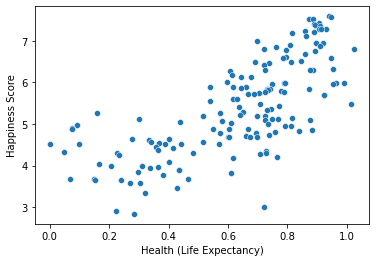

In [12]:
sns.scatterplot(x="Health (Life Expectancy)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

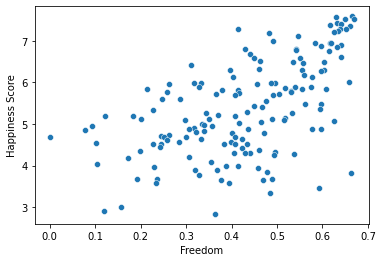

In [13]:
sns.scatterplot(x="Freedom",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

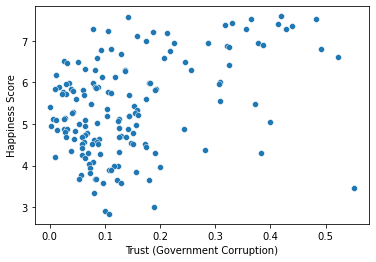

In [14]:
sns.scatterplot(x="Trust (Government Corruption)",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

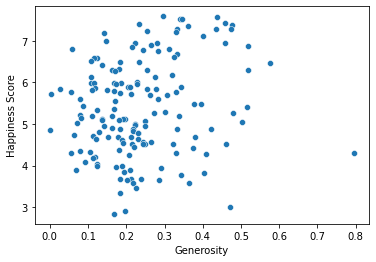

In [15]:
sns.scatterplot(x="Generosity",y="Happiness Score",data=df)

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Happiness Score'>

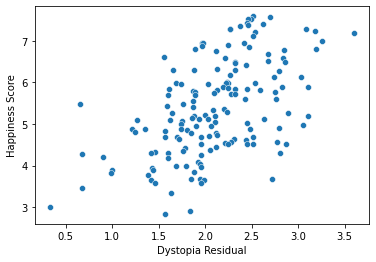

In [16]:
sns.scatterplot(x="Dystopia Residual",y="Happiness Score",data=df)

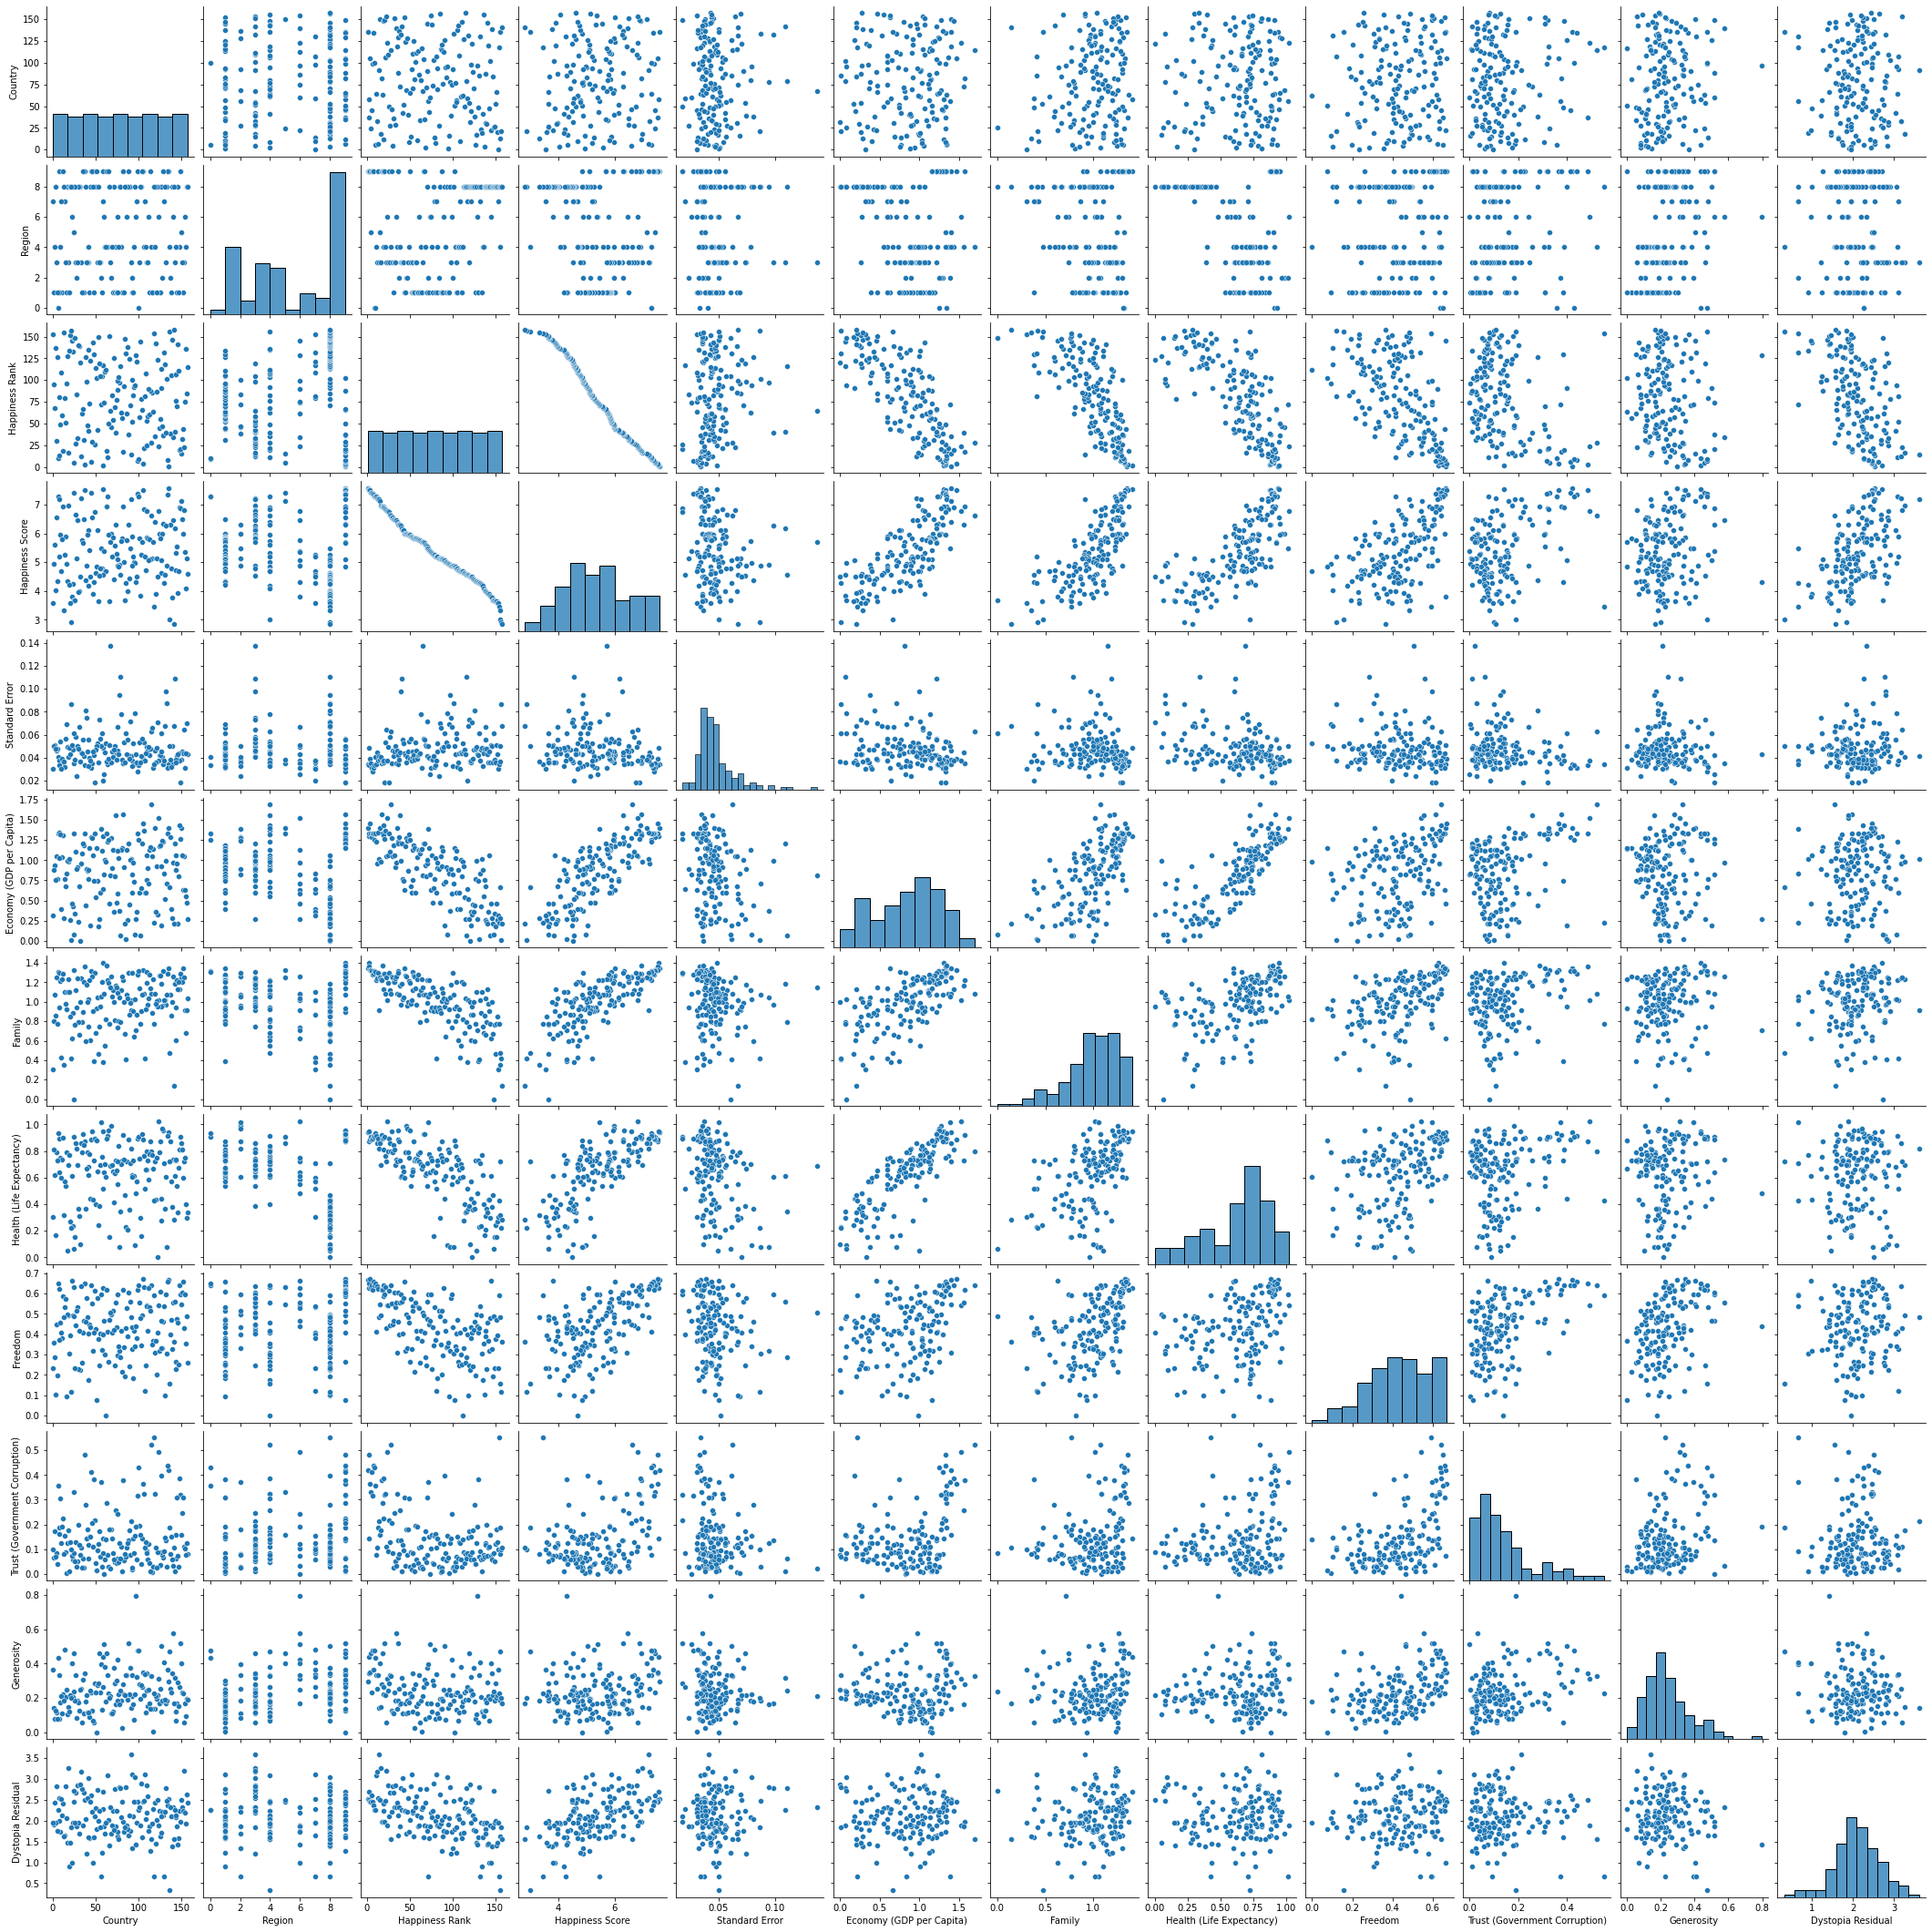

In [17]:
sns.pairplot(df)

# Deriving Correlations

In [18]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


In [19]:
df.corr()['Happiness Score'].sort_values()

Happiness Rank                  -0.992105
Standard Error                  -0.177254
Region                          -0.176791
Country                          0.083380
Generosity                       0.180319
Trust (Government Corruption)    0.395199
Dystopia Residual                0.530474
Freedom                          0.568211
Health (Life Expectancy)         0.724200
Family                           0.740605
Economy (GDP per Capita)         0.780966
Happiness Score                  1.000000
Name: Happiness Score, dtype: float64

Derived results from Correlations

1. Economy(GDP per Capita) is 78% co-related to Happiness Score
2. Family is 74% co-related to Happiness Score
3. Freedom is 57% co-related to Happiness Score
4. Dystopia Residual is 53% co-related to Happiness Score

<AxesSubplot:>

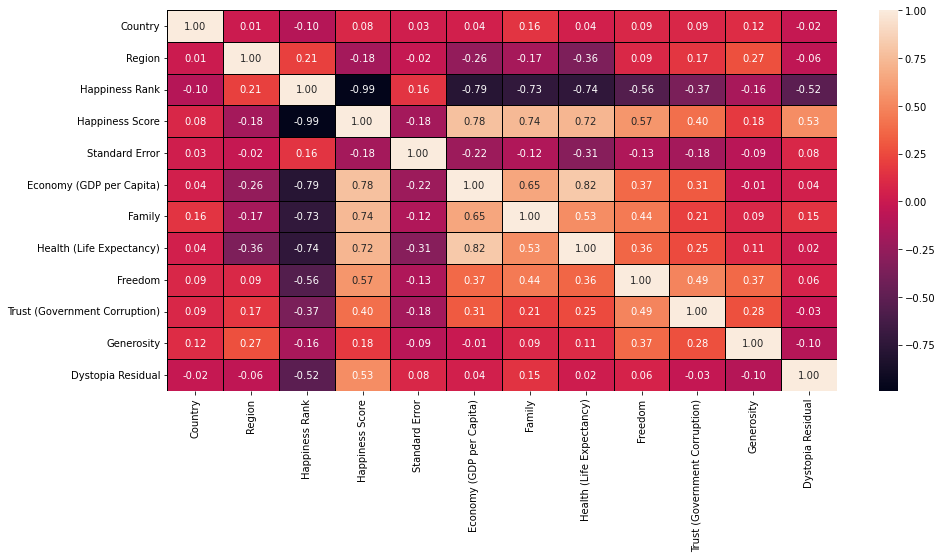

In [20]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

# Descriptive Statistics

In [21]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

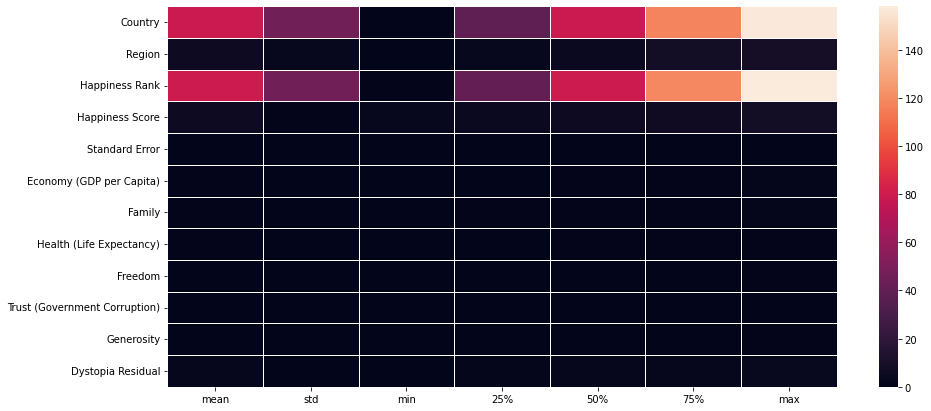

In [22]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=False, linewidths=0.5,linecolor="white", fmt='f')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

# Checking Outliers

In [24]:
collist=df.columns.values
ncol=15
nrows=14

In [25]:
collist

array(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

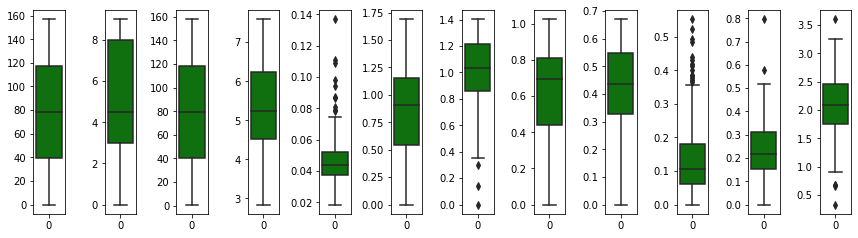

In [26]:
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Checking Skewness

In [27]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Normal Distribution Curve

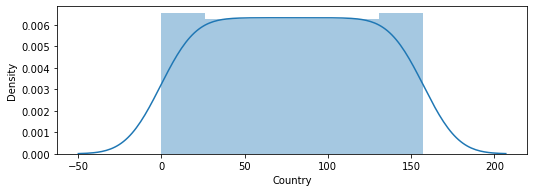

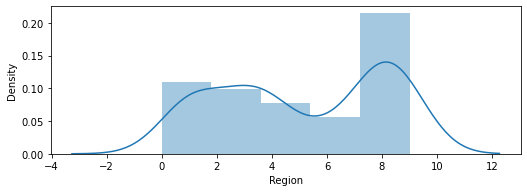

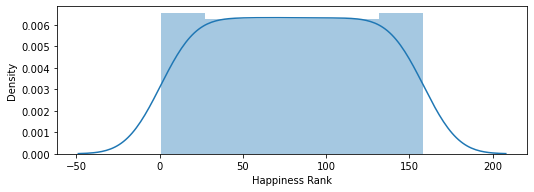

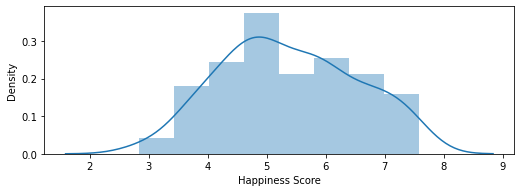

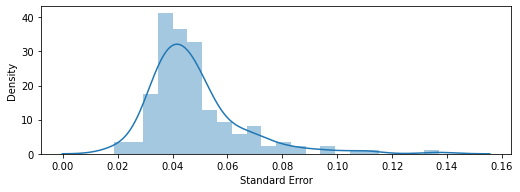

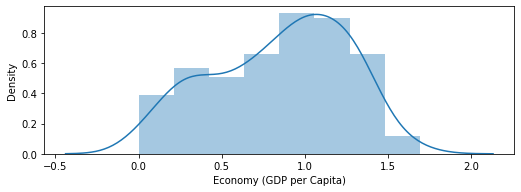

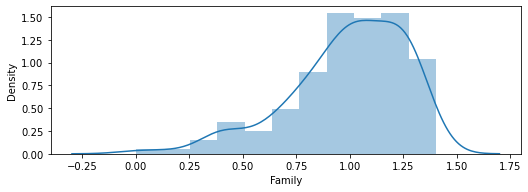

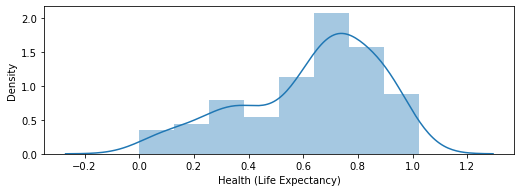

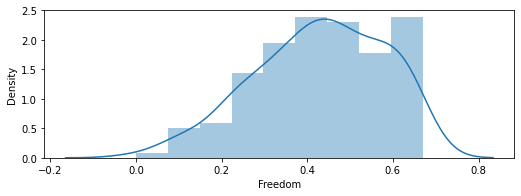

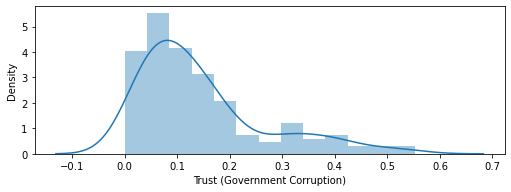

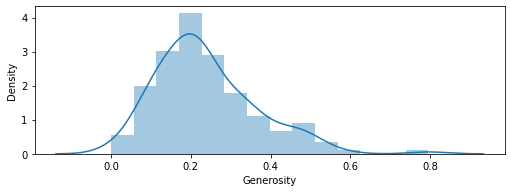

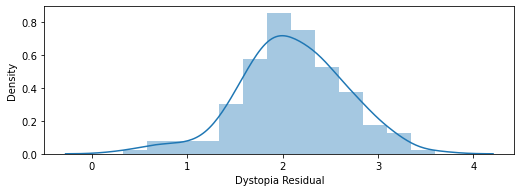

In [28]:
for i in range(0,len(collist)):
    plt.figure(figsize=(10*ncol,3*ncol))
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.show()

Normal distribution curve shows that the data is SKEWED

# Data Cleaning

In [29]:
df.corr()['Happiness Score']

Country                          0.083380
Region                          -0.176791
Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

In [30]:
df1=df.drop(["Country","Region","Happiness Rank","Standard Error"],axis=1)
df1

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Removing Outliers

> Using Z-Score Technique

In [31]:
z=np.abs(zscore(df1))
z.shape

(158, 8)

In [32]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [33]:
len(np.where(z>3)[0])

6

In [34]:
df1.drop([27, 128, 147, 153, 155, 157],axis=0)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [35]:
df1=df1[(z<3).all(axis=1)]
df1

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


# Percentage Data Loss

In [36]:
loss_percent=(158-152)/158*100
print(loss_percent,'%')

3.79746835443038 %


# Re Arranging the columns for further process with target at the last

In [37]:
column_to_move = df1.pop("Happiness Score")
df1.insert(7, "Happiness Score", column_to_move)
df1

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,3.655
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,3.587
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.575
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340


# Removing Skewness

In [38]:
# independent Column
x=df1.iloc[:,:-1]
# target
y=df1.iloc[:,-1]

In [39]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.49611068,  1.66761865,  1.48143363, ...,  1.8220699 ,
         0.65595135,  0.74453432],
       [ 1.19771756,  2.02101058,  1.52291872, ...,  0.35523024,
         1.57166845,  1.10426166],
       [ 1.27024568,  1.7401529 ,  1.06659878, ...,  1.95457489,
         0.97742359,  0.69531125],
       ...,
       [-1.35114936, -2.09149024, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.4183337 , -2.01503265, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827051, -1.91154624, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.49611068,  1.66761865,  1.48143363, ...,  1.8220699 ,
         0.65595135,  0.74453432],
       [ 1.19771756,  2.02101058,  1.52291872, ...,  0.35523024,
         1.57166845,  1.10426166],
       [ 1.27024568,  1.7401529 ,  1.06659878, ...,  1.95457489,
         0.97742359,  0.69531125],
       ...,
       [-1.35114936, -2.09149024, -1.35026722, ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.4183337 , -2.01503265, -1.30696688, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.91827051, -1.91154624, -1.55177307, ..., -0.11827784,
        -0.18319784, -0.57122297]])

# Using Binary Regression Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=44)
print('x train shape:',x_train.shape)
print('y train shape:',y_train.shape)
print('x test shape:',x_test.shape)
print('y test shape:',y_test.shape)

x train shape: (101, 7)
y train shape: (101,)
x test shape: (51, 7)
y test shape: (51,)


# Linear Regression Model

In [44]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
lr.intercept_

5.43527117388083

In [46]:
lr.coef_

array([0.39450159, 0.24856306, 0.24635862, 0.15106349, 0.07736992,
       0.0939045 , 0.50636194])

In [47]:
lr.score(x_train,y_train)

0.9935999013824889

In [48]:
pred=lr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

predicted result  [5.82507258 4.77337386 6.59238995 3.74006148 5.84938381 7.299495
 6.34058088 5.71790331 3.9302823  4.65091561 7.00912605 4.67015561
 5.71048507 4.74360504 5.90712478 3.96693011 4.01058401 6.31025445
 6.03465867 6.03774059 7.59101862 5.26834732 4.9010935  6.76083711
 4.91501035 4.59411    5.47178555 5.08768749 4.10005779 3.22533058
 4.83398742 3.75376613 5.02118205 5.76236191 5.94613435 4.9846944
 5.45147793 4.33671538 6.70817098 4.438688   7.32281907 6.36296854
 5.06824145 3.72613496 6.0565151  7.35065867 4.46591692 4.6980665
 6.64588749 7.40813446 5.24629522]
actual result 53     5.855
108    4.694
29     6.574
146    3.681
59     5.791
9      7.284
34     6.411
66     5.689
143    3.845
107    4.715
17     6.940
112    4.642
61     5.759
106    4.739
47     5.975
139    3.956
138    3.989
33     6.455
42     6.123
44     5.995
3      7.522
80     5.194
95     4.949
23     6.798
100    4.867
113    4.633
72     5.429
88     5.098
136    4.033
156    2.905
103    4.80

In [49]:
print('Errors:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred))

Errors:
Mean Absolute Error : 0.05956562065547244
Mean Squared Error : 0.005993485007194654
Root mean Squared Error 0.07741760140429729
r2 score : 0.9952677417671836


# Decission Tree Model

In [50]:
dtm=DecisionTreeRegressor()
dtm.fit(x_train,y_train)
dtm.score(x_train,y_train)

1.0

In [51]:
predr=dtm.predict(x_test)
print("predicted result ",predr)
print('actual result',y_test)

predicted result  [6.298 5.013 6.786 4.077 5.848 7.278 6.853 5.399 4.252 5.192 6.867 4.681
 5.984 4.35  5.824 3.587 3.995 7.226 5.89  6.505 7.527 4.971 5.124 5.77
 4.61  4.507 5.848 5.102 4.077 3.575 5.848 3.667 5.192 5.77  5.987 4.61
 4.681 3.667 5.987 4.292 7.286 5.77  5.124 3.587 5.987 7.2   4.252 4.839
 5.286 6.485 4.571]
actual result 53     5.855
108    4.694
29     6.574
146    3.681
59     5.791
9      7.284
34     6.411
66     5.689
143    3.845
107    4.715
17     6.940
112    4.642
61     5.759
106    4.739
47     5.975
139    3.956
138    3.989
33     6.455
42     6.123
44     5.995
3      7.522
80     5.194
95     4.949
23     6.798
100    4.867
113    4.633
72     5.429
88     5.098
136    4.033
156    2.905
103    4.800
145    3.781
89     5.073
65     5.695
48     5.960
96     4.898
69     5.548
124    4.419
28     6.575
118    4.518
7      7.364
38     6.295
86     5.123
150    3.655
49     5.948
6      7.378
127    4.332
111    4.677
26     6.670
5      7.406
77     5

In [52]:
print('Errors:')
print('Mean Absolute Error :',mean_absolute_error(y_test,predr))
print('Mean Squared Error :',mean_squared_error(y_test,predr))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,predr)))
print('r2 score :',r2_score(y_test,predr))

Errors:
Mean Absolute Error : 0.33339215686274504
Mean Squared Error : 0.21231927450980387
Root mean Squared Error 0.46078115685193105
r2 score : 0.832359698309329


# K- Neighbour Regression Model

In [53]:
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.9409582590115585

In [54]:
predknr=knr.predict(x_test)
print("predicted result ",predknr)
print('actual result',y_test)

predicted result  [5.7704 4.3776 6.7122 3.9696 5.7484 7.3388 5.5432 5.5796 4.0786 5.3066
 7.1714 4.7052 5.2288 4.5186 5.755  4.1874 3.832  5.7384 6.25   5.9134
 7.4054 4.5184 4.9818 6.8634 4.3106 4.301  5.5916 5.048  4.1848 3.7842
 4.8264 3.9862 5.464  5.8572 6.1952 4.7468 5.6258 4.3774 6.4976 4.2472
 7.4054 6.8774 4.922  3.839  5.7484 7.2614 4.4398 4.7408 6.6502 7.2002
 5.0146]
actual result 53     5.855
108    4.694
29     6.574
146    3.681
59     5.791
9      7.284
34     6.411
66     5.689
143    3.845
107    4.715
17     6.940
112    4.642
61     5.759
106    4.739
47     5.975
139    3.956
138    3.989
33     6.455
42     6.123
44     5.995
3      7.522
80     5.194
95     4.949
23     6.798
100    4.867
113    4.633
72     5.429
88     5.098
136    4.033
156    2.905
103    4.800
145    3.781
89     5.073
65     5.695
48     5.960
96     4.898
69     5.548
124    4.419
28     6.575
118    4.518
7      7.364
38     6.295
86     5.123
150    3.655
49     5.948
6      7.378
127   

In [55]:
print('Errors:')
print('Mean Absolute Error :',mean_absolute_error(y_test,predknr))
print('Mean Squared Error :',mean_squared_error(y_test,predknr))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,predknr)))
print('r2 score :',r2_score(y_test,predknr))

Errors:
Mean Absolute Error : 0.23418039215686276
Mean Squared Error : 0.10064497882352941
Root mean Squared Error 0.3172459279857338
r2 score : 0.9205340417040254


# Support Vector Regression Model

Kernel = RBF

In [56]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.9905989179274308

Kernel = POLY

In [57]:
svp=SVR(kernel='poly')
svp.fit(x_train,y_train)
svp.score(x_train,y_train)

0.9422129795797121

Kernel = Linear

In [58]:
svl=SVR(kernel='linear')
svl.fit(x_train,y_train)
svl.score(x_train,y_train)

0.9929984976042183

# Cross Validation Score

In [59]:
from sklearn.model_selection import cross_val_score
j=[lr,dtm,knr,svr]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=6)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LinearRegression() is
[0.84665289 0.83741806 0.79610115 0.43734333 0.69723077 0.7703069 ]
0.7308421845362084
0.14015350943714958


Cross_Validation_score of DecisionTreeRegressor() is
[ -7.27977311 -11.070425   -15.43012964 -26.01291129 -10.6593928
  -6.71917504]
-12.86196781521012
6.538329711903034


Cross_Validation_score of KNeighborsRegressor() is
[-9.9870393  -2.86397494 -2.86323916 -4.38570152 -6.80378943 -6.15272618]
-5.509411754039278
2.4967213664241736


Cross_Validation_score of SVR() is
[-14.13534758   0.34830457   0.6444986    0.20503375  -0.43541657
  -4.36216475]
-2.955848664105595
5.278614174567623




In [60]:
from sklearn.model_selection import KFold
j=[lr,dtm,knr,svr]
for n in j:
  print('K_Fold',n,'is')
  Kfold=KFold(5)
  score=cross_val_score(n,x,y,cv=Kfold)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

K_Fold LinearRegression() is
[0.87716411 0.81937077 0.7862294  0.72068022 0.81981768]
0.8046524369106324
0.0511767489029244


K_Fold DecisionTreeRegressor() is
[ -6.27904142  -7.40174538  -6.08140112 -12.54860502  -4.62226258]
-7.386611103798127
2.7283077799475275


K_Fold KNeighborsRegressor() is
[-9.61285235 -3.75202606 -1.33424011 -3.3319773  -5.46104384]
-4.698427931225576
2.786172065800598


K_Fold SVR() is
[-9.79748782  0.28686878  0.71600527 -0.04612623 -4.59440369]
-2.6870287365045087
4.039697528260424




# Choosing Model

In [61]:
import joblib
joblib.dump(lr,'Lr_File_World_Happiness_Report.obj')

['Lr_File_World_Happiness_Report.obj']